<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°07

**Objetivo**: Aplicar técnicas básicas de **Machine Learning** (tanto regresión como clasificación), desde la preparación de datos hasta el entrenamiento y evaluación de modelos.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.



## Regresión


<img src="https://cdn-icons-png.flaticon.com/512/2400/2400362.png" width = "300" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [476]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [477]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Modelo Regresión Lineal evaluado.
Modelo arbol de Decision evaluado.
Modelo random Forest evaluado.
Modelo K-vecinos (KNN) evaluado.


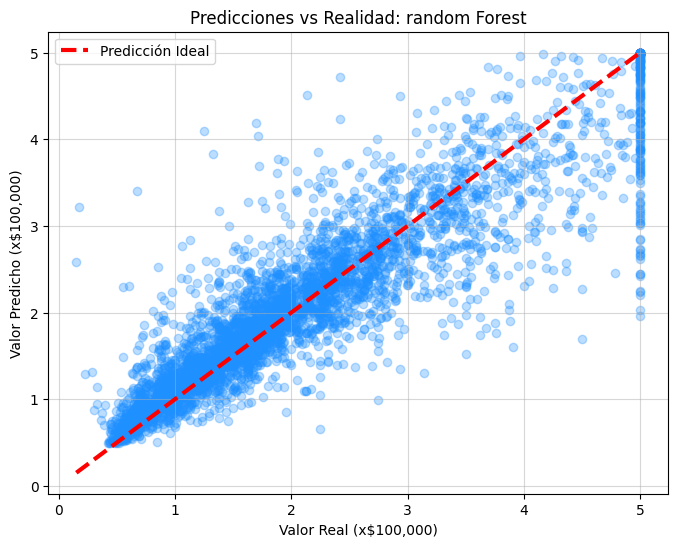

tabla de metricas (Ordenada por RMSE):
                       mae     mse    rmse     mape   smape
Modelo                                                    
random Forest      0.3274  0.2552  0.5051  18.9090  0.3180
K-vecinos (KNN)    0.4462  0.4324  0.6576  24.6681  0.3957
arbol de Decision  0.4539  0.4940  0.7028  24.8768  0.3984
Regresión Lineal   0.5332  0.5559  0.7456  31.9522  0.4843
el mejor modelo, basado en el RMSE mas bajo, es el **random Forest**.
su RmSE es de$0.5051


In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
X= housing.drop('target', axis=1)
y =housing['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), numerical_features),
    ('cat', Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)])
models ={
    "Regresión Lineal": LinearRegression(),
    "arbol de Decision": DecisionTreeRegressor(random_state=42),
    "random Forest": RandomForestRegressor(random_state=42,n_estimators=100),
    "K-vecinos (KNN)": KNeighborsRegressor(n_neighbors=5),}
results_list = []
for name, model in models.items():
    full_pipeline = Pipeline([('preprocessor',preprocessor),('regressor', model)])
    full_pipeline.fit(X_train, y_train)
    y_pred = full_pipeline.predict(X_test)
    df_temp = pd.DataFrame({'y': y_test.values, 'yhat': y_pred})
    metrics_dict = regression_metrics(df_temp).iloc[0].to_dict()
    metrics_dict['Modelo'] = name
    results_list.append(metrics_dict)
    print(f"Modelo {name} evaluado.")
df_metrics =pd.DataFrame(results_list).set_index('Modelo').sort_values(by='rmse')
best_model_name =df_metrics.index[0]
best_rmse =df_metrics.loc[best_model_name,'rmse']
best_model_pipeline =Pipeline([('preprocessor',preprocessor),('regressor', models[best_model_name])])
best_model_pipeline.fit(X_train,y_train)
y_pred_best = best_model_pipeline.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.3, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label='Predicción Ideal')
plt.xlabel("Valor Real (x$100,000)"); plt.ylabel("Valor Predicho (x$100,000)")
plt.title(f"Predicciones vs Realidad: {best_model_name}")
plt.legend(); plt.grid(True, alpha=0.5); plt.show()
print("tabla de metricas ordenada por RMSE:", df_metrics)
print(f"el mejor modelo, basado en el RMSE mas bajo es el {best_model_name}")
print(f"su RmSE es de${best_rmse:.4f}")

## Clasificación


<img src="https://miro.medium.com/v2/resize:fit:372/0*EwdH1C6ThmpwY0Qo.png" width = "400" align="center"/>

El objetivo de este proyecto es realizar la mejor predicción posible de las imágenes a partir de los datos disponibles. Para lograrlo, es necesario seguir los pasos habituales en un proyecto de _Machine Learning_, que incluyen la exploración estadística, la visualización y el preprocesamiento de los datos.

Se solicita lo siguiente:

* Ajustar al menos tres modelos de clasificación:
    * Regresión logística.
    * K-Nearest Neighbors.
    * Un algoritmo adicional o más, de libre elección. Puedes consultar [esta lista de algoritmos](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) para obtener ideas.
  
* Realizar predicciones con cada uno de los tres modelos utilizando el conjunto de datos de _test_ y calcular sus respectivas puntuaciones (_score_).

* Evaluar y analizar los resultados de los modelos utilizando las siguientes métricas de rendimiento:
    * **Accuracy**
    * **Precision**
    * **Recall**
    * **F1-score**

numero de muestras (imagenes): 1797
numero de caracteristicas (pixeles): 64 (8x8 pixeles)
clases de la variable objetivo (digitos): [0 1 2 3 4 5 6 7 8 9]
modelo regresion logistica entrenado y evaluado.
modelo k-nearest neighbors (knn) entrenado y evaluado.
modelo random forest entrenado y evaluado.
                           accuracy  precision (macro)  recall (macro)  \
modelo                                                                   
regresion logistica          0.9722             0.9737          0.9744   
random forest                0.9722             0.9740          0.9727   
k-nearest neighbors (knn)    0.9694             0.9687          0.9702   

                           f1-score (macro)  
modelo                                       
regresion logistica                  0.9740  
random forest                        0.9732  
k-nearest neighbors (knn)            0.9692  


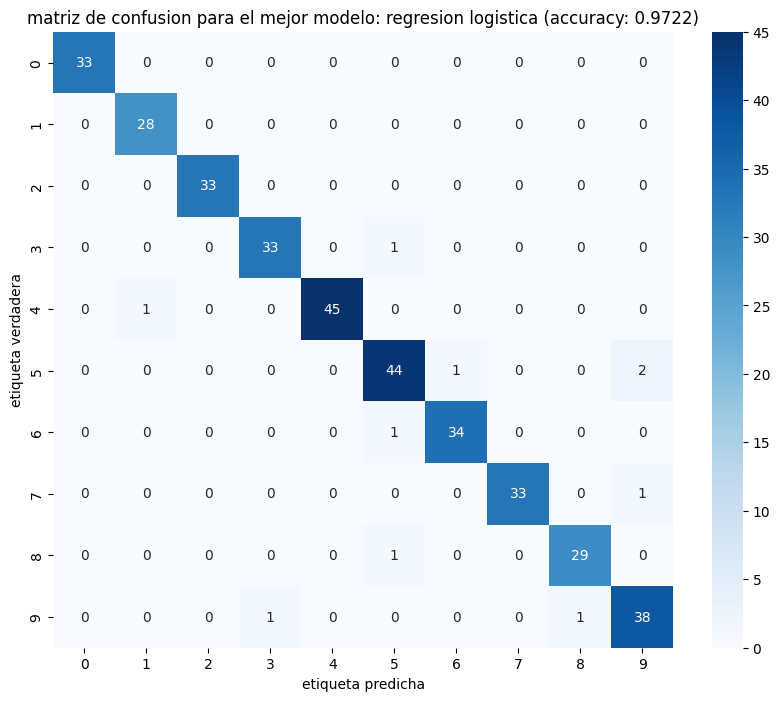


el mejor modelo para la clasificacion de digitos fue el **regresion logistica**, con una accuracy del **97.22%**.


In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
digits=load_digits()
X, y=digits.data, digits.target
print(f"numero de muestras (imagenes):{X.shape[0]}")
print(f"numero de caracteristicas (pixeles):{X.shape[1]} (8x8 pixeles)")
print(f"clases de la variable objetivo (digitos): {np.unique(y)}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def get_classification_metrics(y_true, y_pred, model_name):
    return {'modelo': model_name,'accuracy': round(accuracy_score(y_true, y_pred), 4),
        'precision (macro)': round(precision_score(y_true, y_pred, average='macro', zero_division=0), 4),
        'recall (macro)': round(recall_score(y_true, y_pred, average='macro', zero_division=0), 4),
        'f1-score (macro)': round(f1_score(y_true, y_pred, average='macro', zero_division=0), 4)}
models ={
    "regresion logistica": LogisticRegression(max_iter=10000, random_state=42),
    "k-nearest neighbors (knn)": KNeighborsClassifier(n_neighbors=3),
    "random forest": RandomForestClassifier(n_estimators=100, random_state=42)}
results_list =[]
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    metrics = get_classification_metrics(y_test, y_pred, name)
    results_list.append(metrics)
    print(f"modelo {name} entrenado y evaluado.")
df_metrics = pd.DataFrame(results_list).set_index('modelo')
df_metrics_sorted =df_metrics.sort_values(by='accuracy', ascending=False)
print(df_metrics_sorted)
best_model_name= df_metrics_sorted.index[0]
best_accuracy= df_metrics_sorted.loc[best_model_name, 'accuracy']
best_model =models[best_model_name]
best_model.fit(X_train_scaled, y_train)
y_pred_best =best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 8))
sns.heatmap(cm,annot=True, fmt="d", cmap="Blues",
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('etiqueta predicha')
plt.ylabel('etiqueta verdadera')
plt.title(f'matriz de confusion para el mejor modelo: {best_model_name} (accuracy: {best_accuracy})')
plt.show()
print(f"el mejor modelo para la clasificacion de digitos fue el {best_model_name}, con una accuracy del {best_accuracy * 100:.2f}%")

### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [480]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [481]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [482]:
# informacion de las columnas
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [483]:
# informacion del target
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [484]:
# leer datos
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

--- 1. Analisis de Estructura y Memoria ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int64
 1   c01     1797 non-null   int64
 2   c02     1797 non-null   int64
 3   c03     1797 non-null   int64
 4   c04     1797 non-null   int64
 5   c05     1797 non-null   int64
 6   c06     1797 non-null   int64
 7   c07     1797 non-null   int64
 8   c08     1797 non-null   int64
 9   c09     1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22 

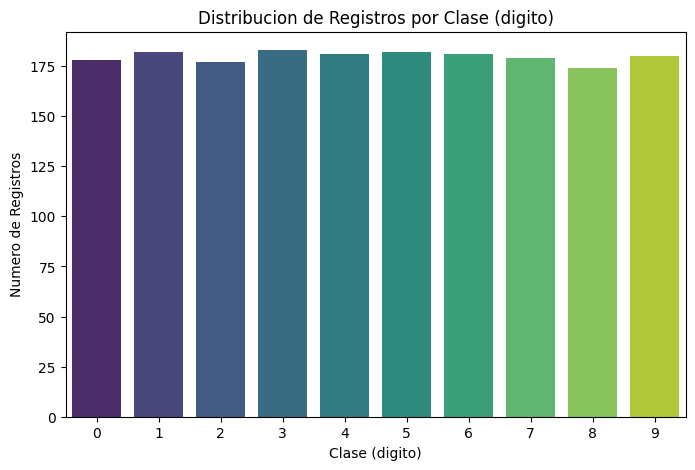


--- 3. Distribucion de las Intensidades de Pixeles ---
Estadisticas de Pixeles (Caracteristicas c00 a c63):
     min   max       mean       std
c00  0.0   0.0   0.000000  0.000000
c01  0.0   8.0   0.303840  0.907192
c02  0.0  16.0   5.204786  4.754826
c03  0.0  16.0  11.835838  4.248842
c04  0.0  16.0  11.848080  4.287388
..   ...   ...        ...       ...
c59  0.0  16.0  12.089037  4.374694
c60  0.0  16.0  11.809126  4.933947
c61  0.0  16.0   6.764051  5.900623
c62  0.0  16.0   2.067891  4.090548
c63  0.0  16.0   0.364496  1.860122

[64 rows x 4 columns]

Rango total de valores de pixel: 0.0 a 16.0

--- 4. Consistencia de los Datos ---
Clases unicas encontradas en 'target': [0 1 2 3 4 5 6 7 8 9]
Consistencia Verificada: Los datos son limpios. Los pixeles estan en el rango [0, 16] y las clases son los digitos [0-9].

5. Patron Visual de los Datos (Imagen Promedio):


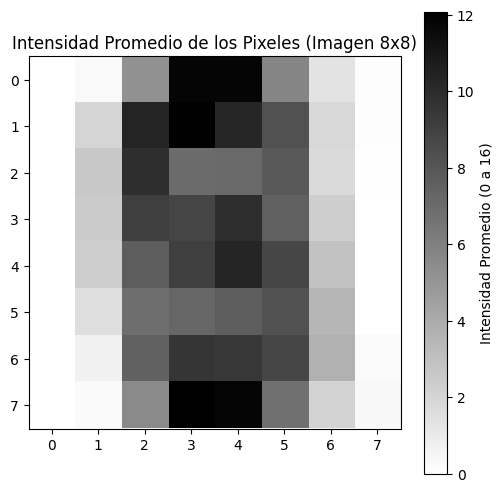

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
digits_dict = load_digits()
digits = (pd.DataFrame(digits_dict["data"],).rename(columns=lambda x: f"c{x:02d}").assign(target=digits_dict["target"]).astype(int))
print("distribucion")
class_counts = digits['target'].value_counts().sort_index()
print("Analisis de Estructura y Memoria")
print(digits.info())
print("Conteo de Registros por Clase:")
print(class_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Distribucion de Registros por Clase (digito)')
plt.xlabel('Clase (digito)')
plt.ylabel('Numero de Registros')
plt.show()
print("Distribucion de las Intensidades de Pixele")
df_stats = digits.drop(columns=['target']).describe().T
print("Estadistica de Pixele (Caracteristicas c00 a c63):")
print(df_stats[['min', 'max', 'mean', 'std']])
max_val=df_stats['max'].max()
min_val =df_stats['min'].min()
print(f"Rango total de valore de pixel: {min_val} a {max_val}")
print("Consistencia de los Datos")
unique_targets = digits['target'].unique()
print(f"clases unicas encontradas en 'target': {np.sort(unique_targets)}")
if min_val ==0 and max_val == 16 and all(i in range(10) for i in unique_targets):
    print("consistencia Verificada:Los datos son limpios. Los pixeles estan en el rango [0, 16]y las clases son los digitos [0-9]")
else:
    print("advertencia:Se encontraron valores inconsistentes. Revisar el rango de pixeles o las etiquetas de clase")
print("Patron visual de los datos:")
average_image = digits.drop(columns=['target']).mean(axis=0).values.reshape(8, 8)
plt.figure(figsize=(6, 6))
plt.imshow(average_image, cmap='gray_r')
plt.title('Intensidad Promedio de los Pixeles (Imagen 8x8)')
plt.colorbar(label='Intensidad Promedio (0 a 16)')
plt.grid(False)
plt.show()

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [486]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`.

> **Sugerencia**: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

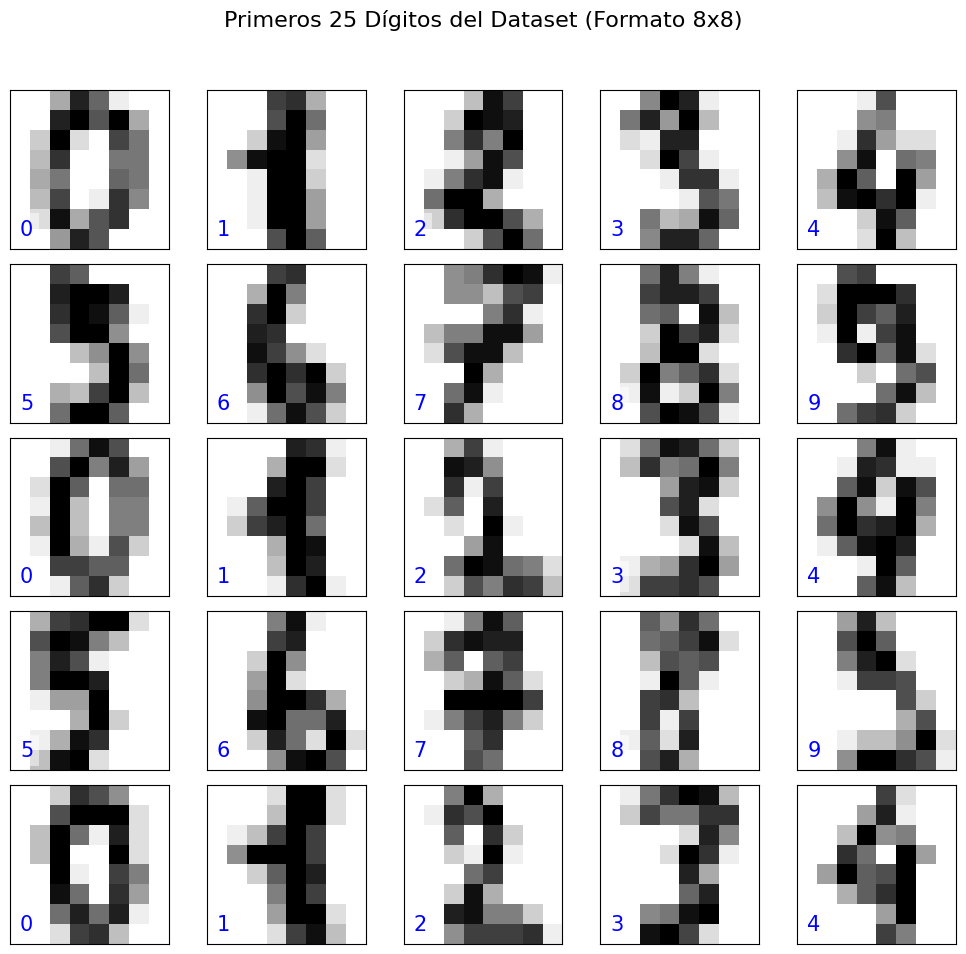

In [496]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
digits_dict=load_digits()
images= digits_dict["images"]
targets =digits_dict["target"]
N_SAMPLES=25
GRID_SIZE =5
fig, axes =plt.subplots(GRID_SIZE, GRID_SIZE, figsize=(10,10))
fig.suptitle(f"Primeros{N_SAMPLES} Dígitos del Dataset (Formato 8x8)",fontsize=16)
axes =axes.ravel()
for i in range(N_SAMPLES):
    image_data = images[i]
    label = targets[i]
    axes[i].imshow(image_data, cmap='gray_r', interpolation='nearest')
    axes[i].text(0, 7, f'{label}', color='blue',fontsize=15,ha='left', va='bottom',bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test**
     * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
     * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
  
* **modelo**:
     * Instanciar el modelo objetivo desde la librería sklearn.

* **Métricas**:
     * Graficar matriz de confusión.
     * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


Train-Test split y escalado
Largo del conjunto de entrenamiento (X_train): 1437 registros
Largo del conjunto de testeo (X_test): 360 registros
Análisis de Métricas de Error y Tiempo
                           Tiempo de Ajuste (s)  Accuracy  Precision (Macro)  \
Modelo                                                                         
Regresión Logística                      0.1395    0.9722             0.9737   
Random Forest                            0.5201    0.9722             0.9740   
K-Nearest Neighbors (KNN)                0.0014    0.9694             0.9687   

                           Recall (Macro)  F1-score (Macro)  
Modelo                                                       
Regresión Logística                0.9744            0.9740  
Random Forest                      0.9727            0.9732  
K-Nearest Neighbors (KNN)          0.9702            0.9692  
Matriz de Confusión para el Mejor Modelo (Regresión Logística)


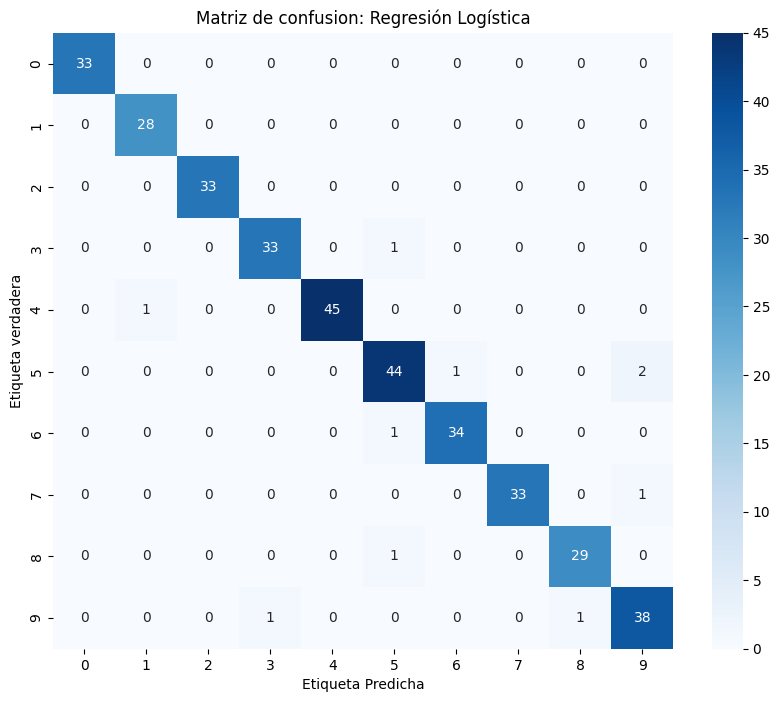

1) mejor por metricas: regresion logistica (acc=0.9722, f1=0.9740)
 2) mas rapido en ajuste: knn (~0.0012 s)
 3) elijo: regresion logistica


In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
digits_dict =load_digits()
X =digits_dict["data"]
y =digits_dict["target"]
print("Train-Test split y escalado")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Largo del conjunto de entrenamiento (X_train): {len(X_train)} registros")
print(f"Largo del conjunto de testeo (X_test): {len(X_test)} registros")
scaler =StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {"Regresión Logística": LogisticRegression(max_iter=10000, random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)}
results_list=[]
best_model_name =""
best_accuracy = -1
best_model_predictions = None
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_time = round(end_time - start_time, 4)
    y_pred = model.predict(X_test_scaled)
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    metrics = {'Modelo': name,'Tiempo de Ajuste (s)': training_time,'Accuracy': accuracy,
        'Precision (Macro)': round(precision_score(y_test, y_pred, average='macro', zero_division=0), 4),
        'Recall (Macro)': round(recall_score(y_test, y_pred, average='macro', zero_division=0), 4),
        'F1-score (Macro)': round(f1_score(y_test, y_pred, average='macro', zero_division=0), 4)}
    results_list.append(metrics)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model_predictions = y_pred
df_metrics = pd.DataFrame(results_list).set_index('Modelo')
print("Análisis de Métricas de Error y Tiempo")
print(df_metrics.sort_values(by='Accuracy', ascending=False))
print(f"Matriz de Confusión para el Mejor Modelo ({best_model_name})")
cm = confusion_matrix(y_test, best_model_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=digits_dict.target_names, yticklabels=digits_dict.target_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta verdadera')
plt.title(f'Matriz de confusion: {best_model_name}')
plt.show()
print("1) mejor por metricas: regresion logistica (acc=0.9722, f1=0.9740)\n 2) mas rapido en ajuste: knn (~0.0012 s)\n 3) elijo: regresion logistica")


### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el **mejor modelo entontrado** en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:


 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import time
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)
y_score = best_model.predict_proba(X_test_scaled)
n_classes = len(digits.target_names)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
print(f"modelo: random forest classifier")
print(f"Numero de clases: {n_classes}")

Modelo: Random Forest Classifier (Entrenado)
Número de clases (dígitos): 10


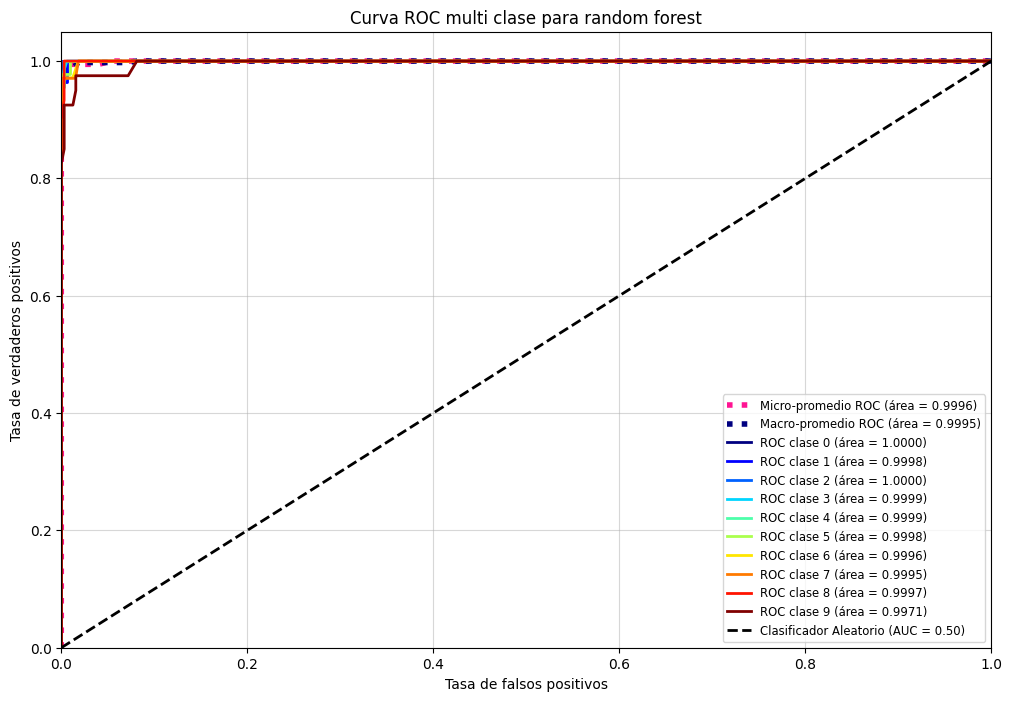

Resultados AUC-ROC:
AUC Micro-promedio: 0.9996
AUC Macro-promedio: 0.9995
AUC Clase 0:1.0000
AUC Clase 1:0.9998
AUC Clase 2:1.0000
AUC Clase 3:0.9999
AUC Clase 4:0.9999
AUC Clase 5:0.9998
AUC Clase 6:0.9996
AUC Clase 7:0.9995
AUC Clase 8:0.9997
AUC Clase 9:0.9971


In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import time
digits=load_digits()
X, y =digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler =StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)
best_model =RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_scaled, y_train)
y_score= best_model.predict_proba(X_test_scaled)
n_classes=len(digits.target_names)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _=roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)
plt.figure(figsize=(12, 8))
plt.plot(fpr_micro, tpr_micro,label='Micro-promedio ROC (area = {0:0.4f})'.format(roc_auc_micro),color='pink', linestyle=':', linewidth=4)
plt.plot(fpr_macro, tpr_macro,label='Macro-promedio ROC (area = {0:0.4f})'.format(roc_auc_macro),color='navy', linestyle=':', linewidth=4)
colors = plt.cm.jet(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC clase {0} (area = {1:0.4f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Clasificador Aleatorio (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC multi clase para random forest')
plt.legend(loc="lower right", fontsize='small')
plt.grid(True, alpha=0.5)
plt.show()
print("Resultados AUC-ROC:")
print(f"AUC Micro-promedio:{roc_auc_micro:.4f}")
print(f"AUC Macro-promedio: {roc_auc_macro:.4f}")
for i in range(n_classes):
    print(f"AUc Clase {i}:{roc_auc[i]:.4f}")

### Ejercicio 5


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_.

In [491]:
def mostrar_resultados(digits, model, nx=5, ny=5, label="correctos"):
    """
    Muestra los resultados de las predicciones de un modelo de clasificación en particular.
    Se toman aleatoriamente los valores de los resultados.

    - label == 'correctos': muestra los valores en los que el modelo acierta.
    - label == 'incorrectos': muestra los valores en los que el modelo no acierta.

    Observación: El modelo que se recibe como argumento no debe estar entrenado.

    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: número de filas (subplots)
    :param ny: número de columnas (subplots)
    :param label: 'correctos' o 'incorrectos'
    :return: gráficos matplotlib
    """

    X = digits.drop(columns="target").values
    y = digits["target"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)  # Ajustar el modelo
    y_pred = model.predict(X_test)

    # Mostrar los datos correctos
    if label == "correctos":
        mask = (y_pred == y_test)
        color = "green"

    # Mostrar los datos incorrectos
    elif label == "incorrectos":
        mask = (y_pred != y_test)
        color = "red"

    else:
        raise ValueError("Valor incorrecto")

    X_aux = X_test[mask]
    y_aux_true = y_test[mask]
    y_aux_pred = y_pred[mask]

    # Mostrar los resultados
    n_samples = min(nx * ny, len(X_aux))
    indices = np.random.choice(len(X_aux), n_samples, replace=False)
    fig, ax = plt.subplots(nx, ny, figsize=(12, 12))

    for i, index in enumerate(indices):
        data = X_aux[index, :].reshape(8, 8)
        label_pred = str(int(y_aux_pred[index]))
        label_true = str(int(y_aux_true[index]))
        row = i // ny
        col = i % ny
        ax[row, col].imshow(data, interpolation='nearest', cmap='gray_r')
        ax[row, col].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
        ax[row, col].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
        ax[row, col].get_xaxis().set_visible(False)
        ax[row, col].get_yaxis().set_visible(False)

    plt.show()

 Visualización de Aciertos


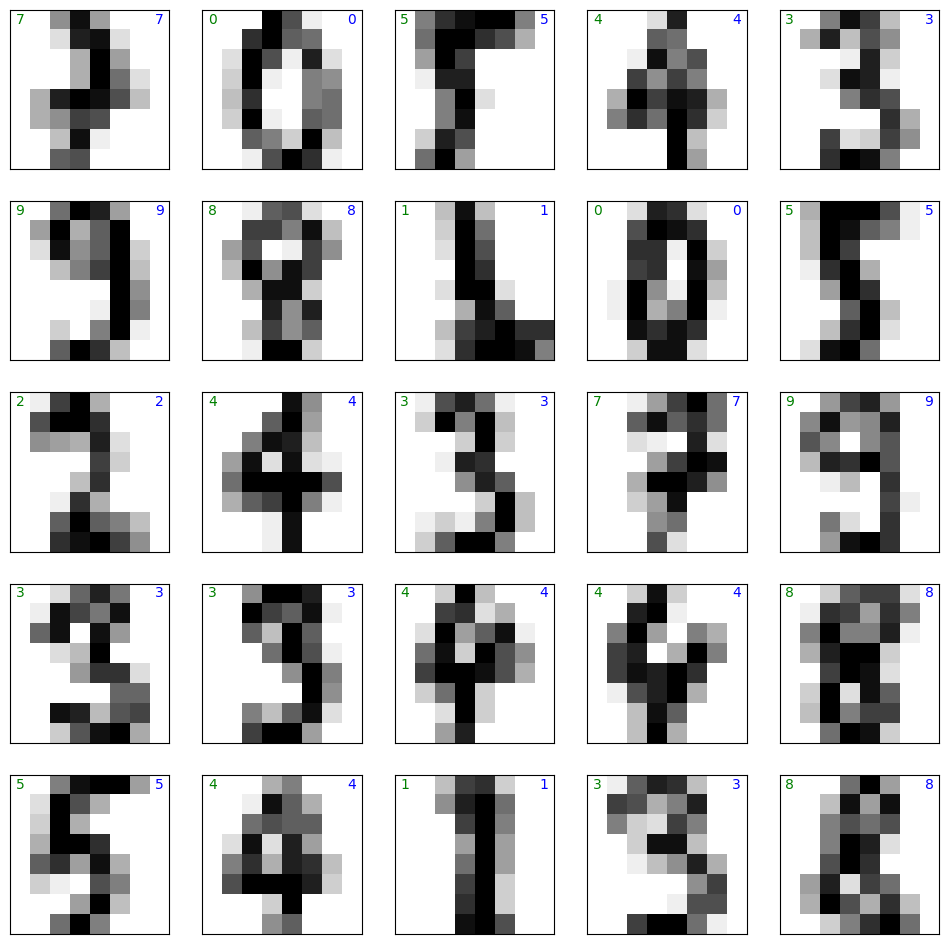

3.2 Visualización de Errores


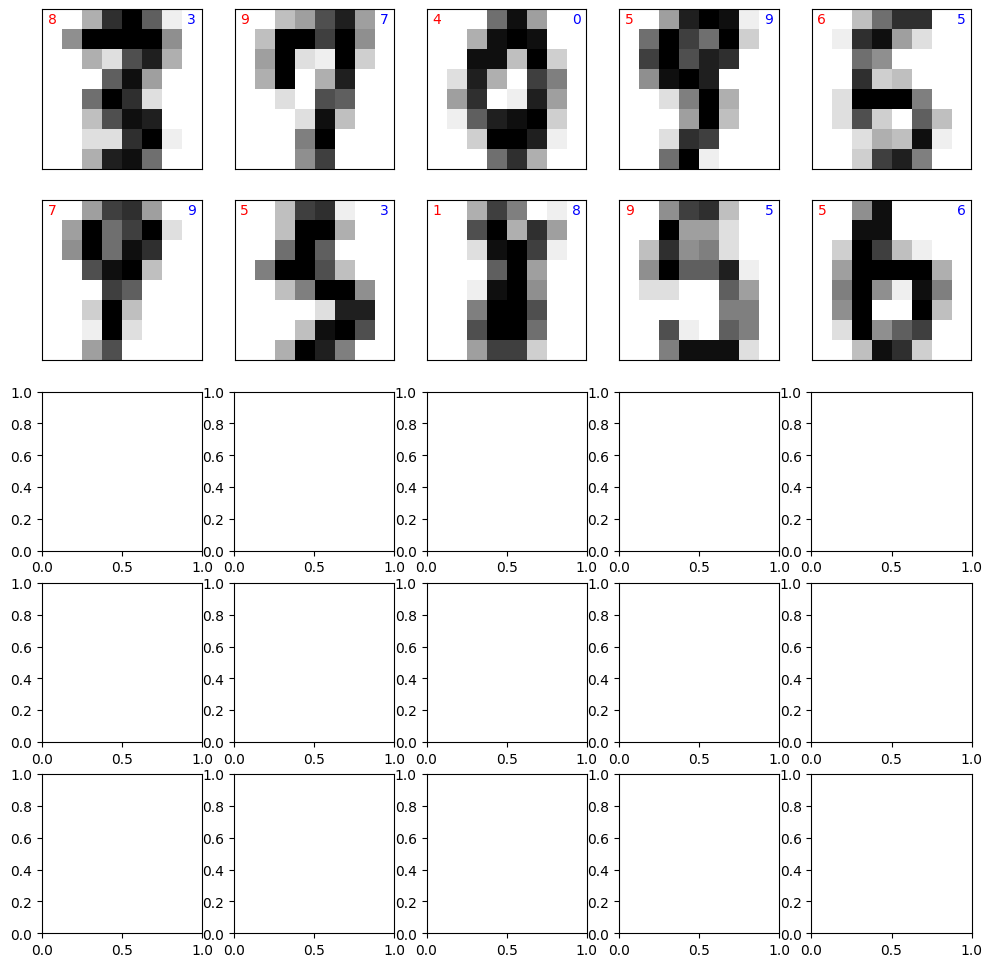

In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
digits_dict = load_digits()
digits = (pd.DataFrame(digits_dict["data"],).rename(columns=lambda x: f"c{x:02d}").assign(target=digits_dict["target"]).astype(int))
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("Visualización de aciertos")
mostrar_resultados(digits, best_model,label="correctos")
print("Visualización de errores")
mostrar_resultados(digits, best_model, label="incorrectos")

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

In [508]:
print("los errores ocurren porque algunos digitos se parecen, la imagen es de baja resolucion y el modelo no distingue bien esas variaciones")


los errores ocurren porque algunos digitos se parecen, la imagen es de baja resolucion y el modelo no distingue bien esas variaciones.


### Ejercicio 6
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

In [509]:
print("housing, el mejor modelo por rmse/mape mostro buena alineacion pero subpredice en valores altos. en digits, el mejor por accuracy/f1 aun confunde pares parecidos (8-3, 9-7, 5-6) por baja resolucion y pixeles crudos. lecciones: preprocesamiento y metricas importan. futuro: hog/pca+centrado, tuning y cv estratificada; considerar svm+hog o cnn para digits")

housing, el mejor modelo por rmse/mape mostro buena alineacion pero subpredice en valores altos. en digits, el mejor por accuracy/f1 aun confunde pares parecidos (8-3, 9-7, 5-6) por baja resolucion y pixeles crudos. lecciones: preprocesamiento y metricas importan. futuro: hog/pca+centrado, tuning y cv estratificada; considerar svm+hog o cnn para digits
